<a href="https://colab.research.google.com/github/Adithya-Siddam/basic-nn-model/blob/main/AA1_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [4]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize(creds)

In [6]:
worksheet = gc.open('exp01data').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [7]:
df.head()

,Input,Output
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,10.0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
X = df[['Input']].values
y = df[['Output']].values

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [16]:
Scaler = MinMaxScaler()

In [17]:
Scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train1 = Scaler.transform(X_train)

In [20]:
AA1_model = Sequential([
    Dense(units = 5, activation = 'relu', input_shape=[1]),
    Dense(units = 4, activation = 'relu'),
    Dense(units = 1)
])

In [21]:
AA1_model.compile(optimizer= 'rmsprop', loss="mse")

In [34]:
AA1_model.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 11ms/step - loss: 116.3353
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3352
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 116.3351
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3351
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 116.3350
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3349
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 116.3349
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3348
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3347
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3347
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 116.3346
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 116.3346
Epoch 13/2000
1/1 [====

In [35]:
AA1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
loss_df = pd.DataFrame(AA1_model.history.history)

<Axes: >

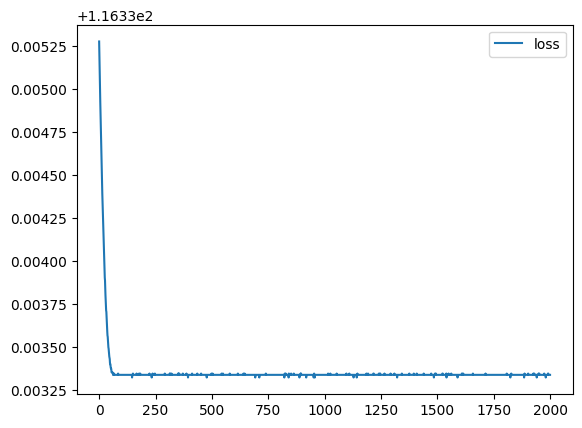

In [37]:
loss_df.plot()

In [38]:
X_test1 = Scaler.transform(X_test)

In [39]:
AA1_model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 130ms/step - loss: 128.9894


128.98939514160156

In [40]:
X_n1 = [[10]]

In [41]:
X_n1_1 = Scaler.transform(X_n1)

In [42]:
AA1_model.predict(X_n1_1)

1/1 [==============================] - 0s 100ms/step


array([[18.999525]], dtype=float32)